<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
#read the output file
df = pd.read_csv("output3D.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8000 non-null   int64  
 1   n                          8000 non-null   int64  
 2   m                          8000 non-null   int64  
 3   Dimension                  8000 non-null   object 
 4   Distribution               8000 non-null   object 
 5   OPT                        8000 non-null   object 
 6   Plurality                  8000 non-null   object 
 7   Plurality Distortion       8000 non-null   float64
 8   Copeland                   8000 non-null   object 
 9   Copeland Distortion        8000 non-null   float64
 10  STV                        8000 non-null   object 
 11  STV Distortion             8000 non-null   object 
 12  Borda                      8000 non-null   object 
 13  Borda Distortion           8000 non-null   float

In [3]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8000 non-null   int64  
 1   n                          8000 non-null   int64  
 2   m                          8000 non-null   int64  
 3   Dimension                  8000 non-null   object 
 4   Distribution               8000 non-null   object 
 5   OPT                        8000 non-null   object 
 6   Plurality                  8000 non-null   object 
 7   Plurality Distortion       8000 non-null   float64
 8   Copeland                   8000 non-null   object 
 9   Copeland Distortion        8000 non-null   float64
 10  STV                        8000 non-null   object 
 11  STV Distortion             6144 non-null   float64
 12  Borda                      8000 non-null   object 
 13  Borda Distortion           8000 non-null   float

In [4]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,3D,normal,Candidate 2,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.0
1,1,200,5,3D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 1,1.015177,Candidate 3,1.0,Candidate 3,1.0
2,2,200,5,3D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0
3,3,200,5,3D,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.0
4,4,200,5,3D,normal,Candidate 4,Candidate 0,1.028145,Candidate 4,1.0,Candidate 4,1.0,Candidate 4,1.000000,Candidate 4,1.0,Candidate 4,1.0


In [5]:
#group by distribution, n, m
group_by_all = df.groupby(["Distribution", "n", "m"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [6]:
group_by_all

Plurality_Distortion_avg  Plurality_Distortion_max  \
Distribution n   m                                                         
bimodal      200 5                    1.091658                  1.496941   
                 10                   1.104978                  1.486846   
                 50                   1.162474                  1.496982   
                 100                  1.177283                  1.522614   
normal       200 5                    1.018713                  1.274850   
                 10                   1.053865                  1.461836   
                 50                   1.195734                  1.772373   
                 100                  1.241256                  1.711862   
poisson      200 5                    1.020023                  1.325566   
                 10                   1.056776                  1.453008   
                 50                   1.187193                  1.653628   
                 100                  1.245084                  1.909568   
uniform      200 5                    1.034342                  1.295715   
                 10                   1.083369                  1.498555   
                 50                   1.244244                  1.725557   
                 100                  1.290030                  1.675748   

                      Copeland_Distortion_avg  Copeland_Distortion_max  \
Distribution n   m                                                       
bimodal      200 5                   1.042410                 1.359057   
                 10                  1.024487                 1.250910   
                 50                  1.017435                 1.143268   
                 100                 1.013603                 1.103702   
normal       200 5                   1.000764                 1.063101   
                 10                  1.000870                 1.064928   
                 50                  1.001217                 1.035702   
                 100                 1.000930                 1.023945   
poisson      200 5                   1.000580                 1.036884   
                 10                  1.000940                 1.058168   
                 50                  1.001302                 1.033342   
                 100                 1.001479                 1.023429   
uniform      200 5                   1.001058                 1.073257   
                 10                  1.000898                 1.059772   
                 50                  1.001118                 1.040705   
                 100                 1.001095                 1.026564   

                      STV_Distortion_avg  STV_Distortion_max  \
Distribution n   m                                             
bimodal      200 5              1.026509            1.248128   
                 10             1.050914            1.239428   
                 50             1.099354            1.224654   
                 100            1.113883            1.262085   
normal       200 5              1.003202            1.113820   
                 10             1.010825            1.176953   
                 50             1.058022            1.220033   
                 100            1.070875            1.231686   
poisson      200 5              1.002615            1.116817   
                 10             1.010471            1.171773   
                 50             1.060015            1.238643   
                 100            1.067660            1.260325   
uniform      200 5              1.004783            1.176294   
                 10             1.018714            1.258362   
                 50             1.081913            1.312496   
                 100            1.102332            1.311211   

                      Borda_Distortion_avg  Borda_Distortion_max  \
Distribution n   m                                                 
bimodal      200 5             

In [7]:
group_by_distribution  = df.groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [8]:
group_by_distribution

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
Distribution,,,,,,,,,,,,
bimodal,1.134098,1.522614,1.024484,1.359057,1.063850,1.262085,1.038870,1.370937,1.006899,1.182579,1.025257,1.325169
normal,1.127392,1.772373,1.000945,1.064928,1.035668,1.231686,1.001442,1.100815,1.001376,1.063101,1.007347,1.124309
poisson,1.127269,1.909568,1.001075,1.058168,1.035090,1.260325,1.001640,1.149219,1.002154,1.069292,1.008386,1.113531
uniform,1.162996,1.725557,1.001042,1.073257,1.051931,1.312496,1.001818,1.138407,1.000787,1.042245,1.012904,1.197674


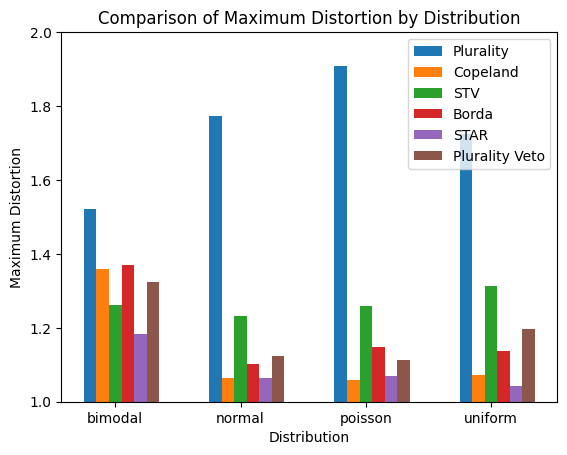

In [9]:

# Extract the data
distribution = group_by_distribution.index
plurality_max = group_by_distribution["Plurality_Distortion_max"]
copeland_max = group_by_distribution["Copeland_Distortion_max"]
stv_max = group_by_distribution["STV_Distortion_max"]
borda_max = group_by_distribution["Borda_Distortion_max"]
star_max = group_by_distribution["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Comparison of Maximum Distortion by Distribution")
plt.xticks(x, distribution)
plt.ylim(1,2)
plt.legend()

# Show the plot
plt.show()



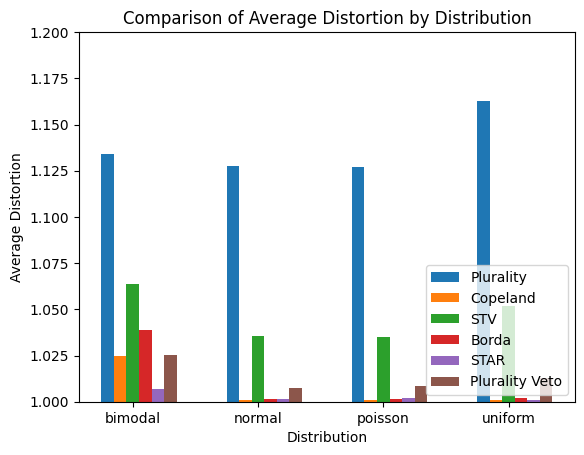

In [11]:
# Extract the data
distribution = group_by_distribution.index
plurality_avg = group_by_distribution["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution["Copeland_Distortion_avg"]
stv_avg = group_by_distribution["STV_Distortion_avg"]
borda_avg = group_by_distribution["Borda_Distortion_avg"]
star_avg = group_by_distribution["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Comparison of Average Distortion by Distribution")
plt.xticks(x, distribution)
plt.ylim(1,1.2)
plt.legend(loc='lower right')




In [12]:
group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_m

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
m,,,,,,,,,,,,
5,1.041184,1.496941,1.011203,1.359057,1.004914,1.248128,1.010827,1.370937,1.001715,1.152702,1.009327,1.325169
10,1.074747,1.498555,1.006799,1.250910,1.014888,1.258362,1.010671,1.234415,1.001801,1.182579,1.009533,1.212492
50,1.197411,1.772373,1.005268,1.143268,1.067726,1.312496,1.010599,1.160481,1.002832,1.076764,1.016318,1.197674
100,1.238414,1.909568,1.004277,1.103702,1.081407,1.311211,1.011673,1.112421,1.003558,1.069292,1.018715,1.154751


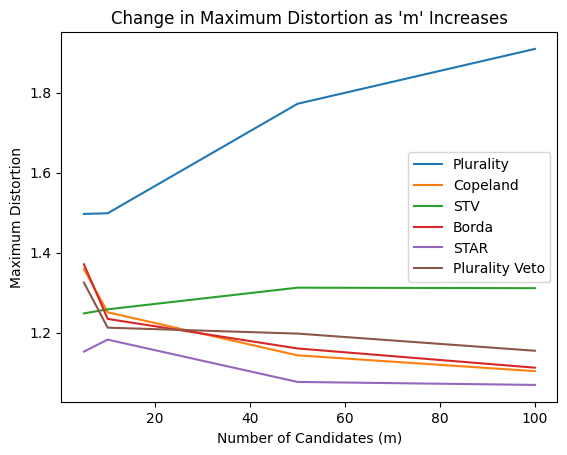

In [13]:
plt.plot(group_by_m.index, group_by_m["Plurality_Distortion_max"], label="Plurality")
plt.plot(group_by_m.index, group_by_m["Copeland_Distortion_max"], label="Copeland")
plt.plot(group_by_m.index, group_by_m["STV_Distortion_max"], label="STV")
plt.plot(group_by_m.index, group_by_m["Borda_Distortion_max"], label="Borda")
plt.plot(group_by_m.index, group_by_m["STAR_Distortion_max"], label="STAR")
plt.plot(group_by_m.index, group_by_m["PluralityVeto_Distortion_max"], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases")
plt.legend()


# Show the plot
plt.show()

In [38]:
# group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
# group_by_n

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max
n,,,,,,,,,,
200,1.178425,2.100644,1.003883,1.230713,1.059872,1.358281,1.013893,1.311625,1.004066,1.158441


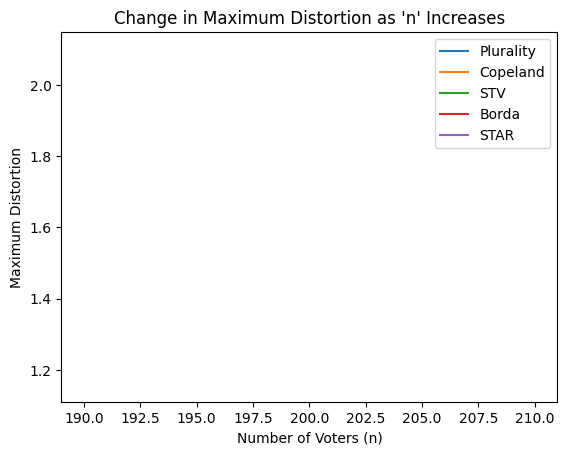

In [39]:
# plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
# plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
# plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
# plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
# plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# # Customize the plot
# plt.xlabel("Number of Voters (n)")
# plt.ylabel("Maximum Distortion")
# plt.title("Change in Maximum Distortion as 'n' Increases")
# plt.legend()


# # Show the plot
# plt.show()

In [14]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution = df.groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

In [16]:
accuracy_by_distribution

,Distribution,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,bimodal,10.00,46.75,4.05,46.3,28.35,44.45
1,normal,32.80,88.25,45.45,81.5,86.65,67.35
2,poisson,31.45,87.50,46.40,79.5,86.75,66.15
3,uniform,24.95,89.05,41.95,88.3,88.25,63.35


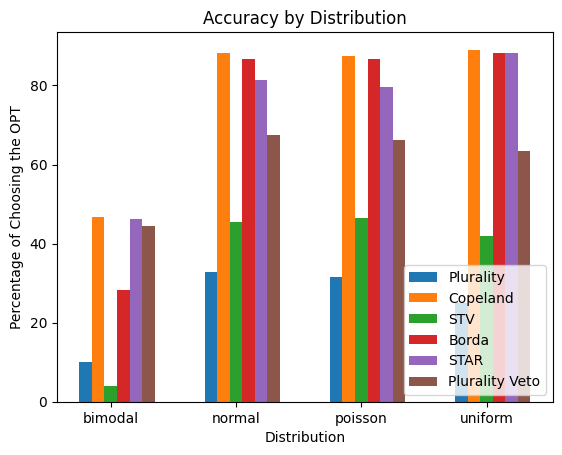

In [17]:
# Extract the data
distribution = accuracy_by_distribution["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution["Borda_percentage"], width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, accuracy_by_distribution["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, accuracy_by_distribution["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Accuracy by Distribution")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [18]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_m = df.groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)
)
accuracy_by_m

,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
m,,,,,,
5,58.50,83.10,68.30,81.30,81.00,82.65
10,34.05,82.95,54.20,81.85,77.55,74.15
50,4.85,74.40,11.15,71.15,67.65,49.55
100,1.80,71.10,4.20,61.30,63.80,34.95


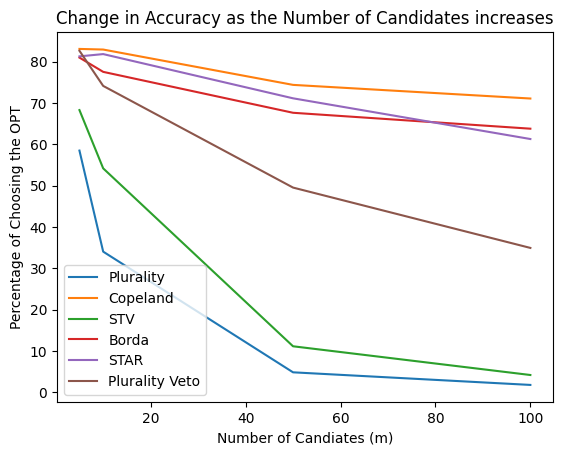

In [19]:
plt.plot(accuracy_by_m.index, accuracy_by_m["Plurality_percentage"], label="Plurality")
plt.plot(accuracy_by_m.index, accuracy_by_m["Copeland_percentage"], label="Copeland")
plt.plot(accuracy_by_m.index, accuracy_by_m["STV_percentage"], label="STV")
plt.plot(accuracy_by_m.index, accuracy_by_m["Borda_percentage"], label="Borda")
plt.plot(accuracy_by_m.index, accuracy_by_m["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m.index, accuracy_by_m["PluralityVeto_percentage"], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Change in Accuracy as the Number of Candidates increases")
plt.legend()


# Show the plot
plt.show()